<a href="https://colab.research.google.com/github/esmaeilifardi/GradientBoostingClassifier---mushroom_csv.csv-Dataset/blob/main/GradientBoostingClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('mushroom_csv.csv')
df = pd.DataFrame(df)

In [ ]:
df.head(2)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e


In [ ]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [ ]:
df2 = df.drop('stalk-root', axis=1)

In [ ]:
df2.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

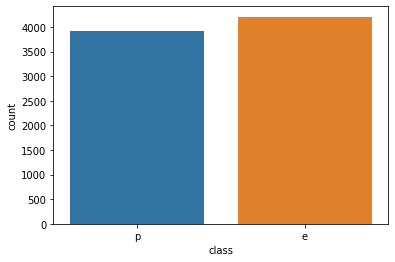

In [ ]:
sns.countplot(data=df2, x='class')

In [ ]:
df2.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
14,veil-type,8124,1,p,8124
21,class,8124,2,e,4208
3,bruises%3F,8124,2,f,4748
5,gill-attachment,8124,2,f,7914
6,gill-spacing,8124,2,c,6812
7,gill-size,8124,2,b,5612
9,stalk-shape,8124,2,t,4608
16,ring-number,8124,3,o,7488
15,veil-color,8124,4,w,7924
11,stalk-surface-below-ring,8124,4,s,4936


In [ ]:
des = df2.describe().transpose().reset_index().sort_values('unique') #a is one of des column & b is one of des column

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

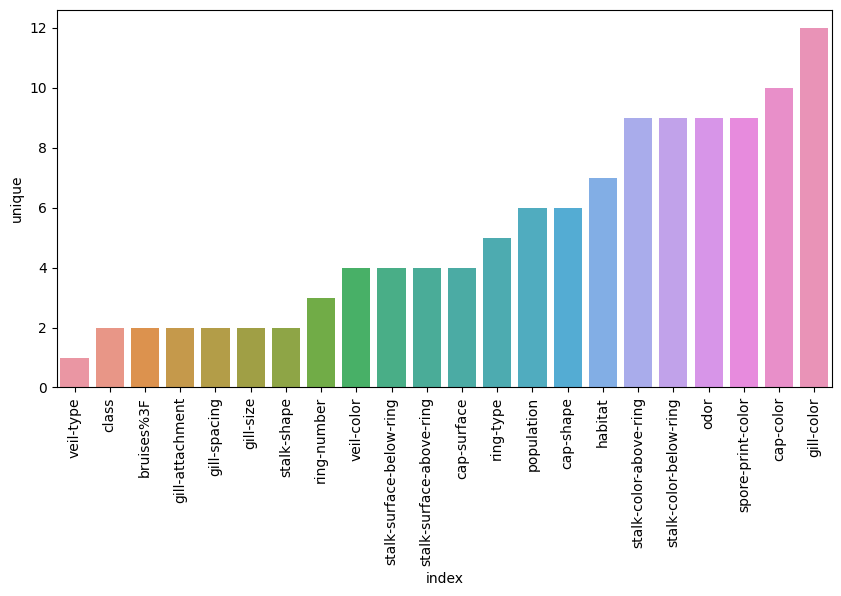

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=des, x='index', y='unique')
plt.xticks(rotation=90) #rotate x labels

In [ ]:
df2.drop('veil-type', axis=1, inplace=True) #becouse that is only 1 unique

In [ ]:
X = df2.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df2['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=101)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[50,100],
          'learning_rate':[0.05, 0.10, 0.2],
          'max_depth':[3,4,5]}

grid = GridSearchCV(model, param_grid=params)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [ ]:
#plot_confusion_matrix(grid, X_train, X_test)

In [ ]:
feature_importances = grid.best_estimator_.feature_importances_

In [ ]:
feature_importances = pd.DataFrame(data= feature_importances, index= X.columns, columns=['feature_importances'])

In [ ]:
feature_importances

,feature_importances
cap-shape_c,6.311107e-04
cap-shape_f,4.756625e-16
cap-shape_k,1.271333e-15
cap-shape_s,0.000000e+00
cap-shape_x,4.150696e-15
...,...
habitat_l,2.843216e-06
habitat_m,1.517437e-16
habitat_p,0.000000e+00
habitat_u,0.000000e+00


In [ ]:
feature_importances = feature_importances[feature_importances['feature_importances']>0.0005]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

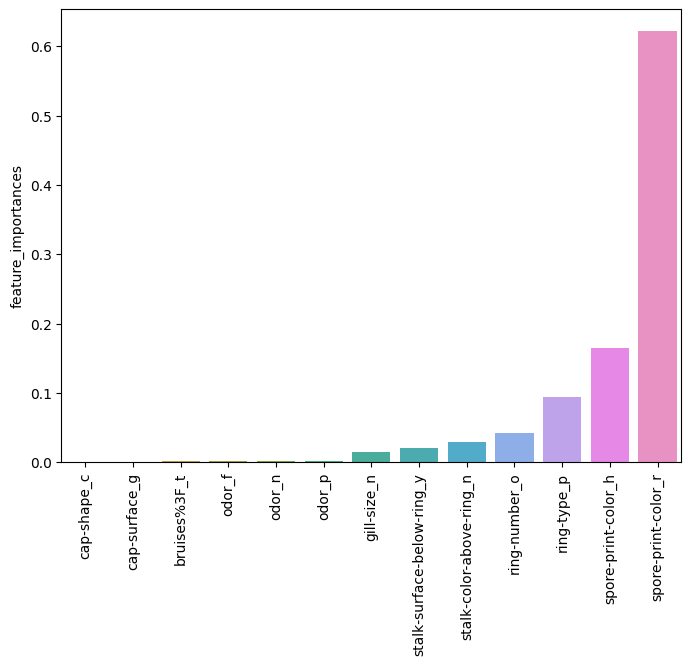

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
sns.barplot(data=feature_importances.sort_values('feature_importances'), x= feature_importances.index, y='feature_importances')
plt.xticks(rotation=90)